# The Billboard Hot 100

Started by Billboard Magazine the Billboard Hot 100 is the industry standard record chart in the United States. It is published on a weekly basis (the cut-off date being Saturday). 

Chart rankings are based on sales (physical and digital), radio play, and online streaming in the United States.

The weekly tracking period for sales was initially Monday to Sunday when Nielsen started tracking sales in 1991, but was changed to Friday to Thursday in July 2015. This tracking period also applies to compiling online streaming data. Radio airplay, which, unlike sales figures and streaming, is readily available on a real-time basis, is tracked on a Monday to Sunday cycle (previously Wednesday to Tuesday).[1] A new chart is compiled and officially released to the public by Billboard on Tuesdays.

The Billboard Hot 100 goes way back to 1958 and has had hundreds of songs listed and yet, I'm fascinated that only a small amount of all music makes its way onto this chart. In this notebook I'll explore the songs that make it onto the Hot 100 and in the process answer a few questions, I've always had about this famous weekly list.

In [150]:
import numpy as np
import pandas as pd

hot100 = pd.read_csv('../data/processed/hot100.csv',parse_dates=['date','entry_date','exit_date','peak_date'],sep='\t')
hot100_uniq = hot100.drop_duplicates(subset=['artist','title'])
hits = pd.read_csv('../data/processed/hits_uniq.csv',sep='\t')
nhits = pd.read_csv('../data/processed/nhits_uniq.csv',sep='\t')

hot100.head()

,rank,date,title,artist,reentry,streak,ranked,entry_date,entry,exit_date,exit,peak,peak_date,low
0,1,1967-07-08,Windy,The Association,0,13,14,1967-05-27,52,1967-08-26,34,1,1967-05-27,52
1,2,1967-07-08,Little Bit O' Soul,The Music Explosion,0,15,16,1967-05-13,90,1967-08-26,46,2,1967-05-13,90
2,3,1967-07-08,Can't Take My Eyes Off You,Frankie Valli,0,15,16,1967-05-20,74,1967-09-02,35,2,1967-05-20,74
3,4,1967-07-08,San Francisco (Be Sure To Wear Flowers In Your...,Scott McKenzie,0,11,12,1967-05-27,98,1967-08-12,28,4,1967-05-27,98
4,5,1967-07-08,Don't Sleep In The Subway,Petula Clark,0,9,10,1967-06-03,76,1967-08-05,42,5,1967-06-03,76


# Data

The **Hot 100 charts, hits sample, audio-features and non-hits sample** have been obtained from **Billboard.com (Hot 100)** and the **Spotify API (Audio Features and Non Hits Sample)**

The **hits** sample is a subset of the **Hot 100** charts, enriched using the [Spotify Audio Features Endpoint](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/). Unfortunately, not all songs could be matched with a Spotify ID and retrieved. Hence, **hits** has dropped all songs that came back empty.

The **non-hits** sample is sampled using the [Spotify API Search](https://developer.spotify.com/documentation/web-api/reference/search/search/), randomly sampling a songs by year, so as to find songs that did not become hits. As that method overemphasizes popular songs, I've sampled 20% of each year from the lowest popularity (i.e. Spotify's popularity score).

For more information check out the Wrangling notebook *Wrangling (Hot 100 and Spotify Sample)*.

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

GrayO = ["orange","gray","black"]
sns.set_palette(GrayO)

%matplotlib inline
%config InlineBackend.figure_format='retina'

# The History

We'll start by looking into the general distribution of songs in the Hot 100.

- How many songs made it onto the Hot 100 since 1958?
- How long did songs stay on the Hot 100?
- What positions have the most fluctuation?

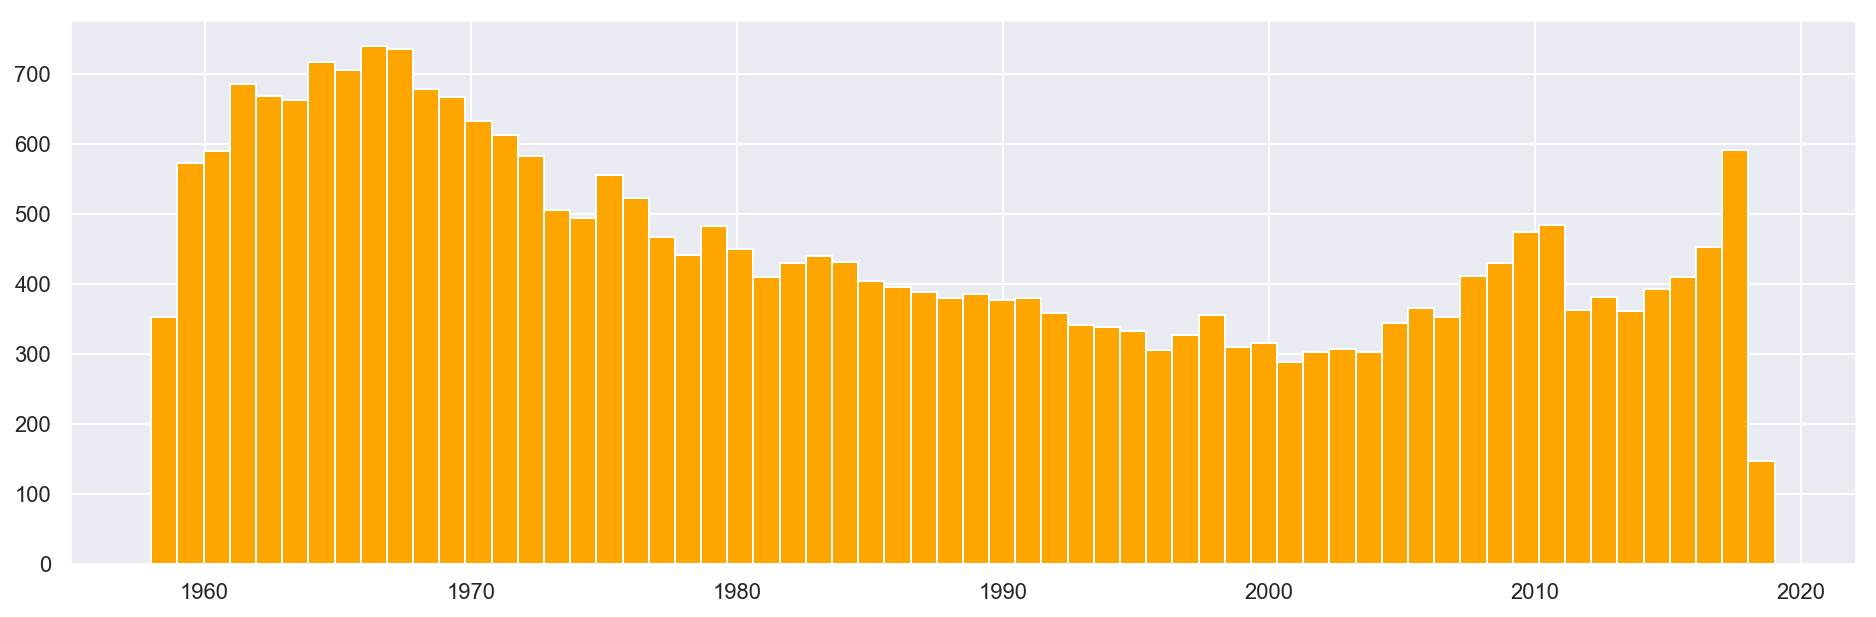

In [152]:
_ = plt.figure(figsize=(16,5))

hot100_uniq.loc[:,'entry_year'] = hot100_uniq.loc[:,'entry_date'].dt.year

years = len(hot100_uniq['entry_year'].unique())
_ = plt.hist(hot100_uniq['entry_year'],bins=years)

In [153]:
# Number of Unique Songs on the Hot 100 since 1958
print("Since 1958 there were *{}* songs on the Billboard Hot 100.".format(len(hot100_uniq)))

Since 1958 there were *28083* songs on the Billboard Hot 100.


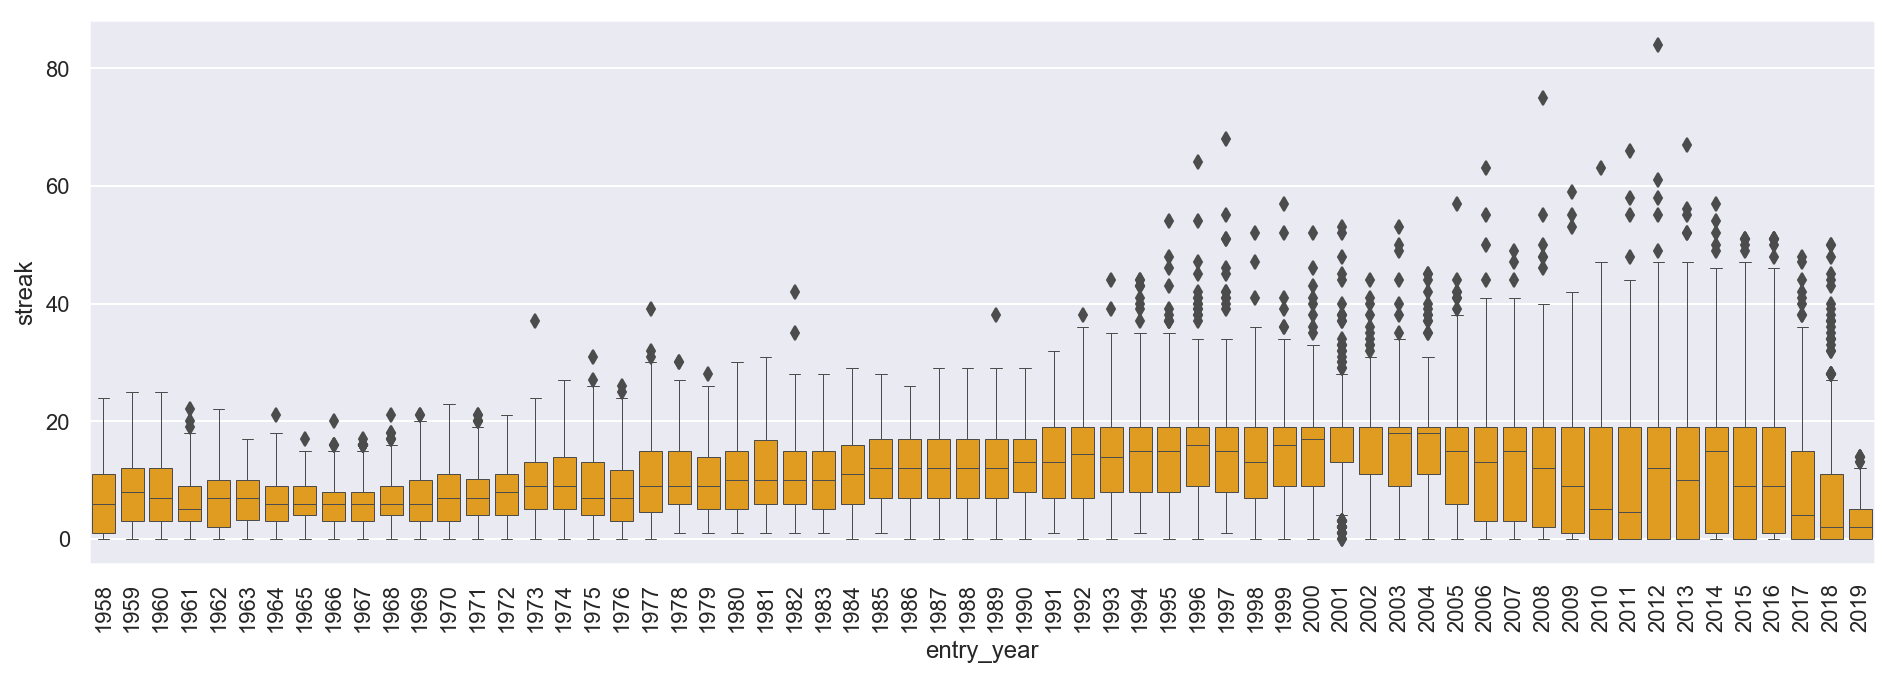

In [168]:
_ = plt.figure(figsize=(16,5))

_ = sns.boxplot(x='entry_year',y='streak',data=hot100_uniq,color='orange',linewidth=0.5)
_ = plt.xticks(rotation=90)

Questions:
    - Weird horizontal line 1990 - 2016
    - Pattern erupts of "Super Songs" around 1994
    - More songs have quicker turn-arounds starting in 2007 (streaming data?)

In [ ]:
_ = plt.figure(figsize=(16,5))
_ = plt.hist(nhits['popularity'],bins=100)
_ = plt.xlim(105, -5)